In [94]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime, timedelta
import seaborn as sns
import scipy as sp

In [95]:
# functions

"""
function that performs outlier fildtering using the IQR method on the given column
a plot with the records in dataframe before and after the filtering is produced.
"""
def outlier_IQR(df, column_name):
    print('Removing outliers from column: ', column_name, ' using IQR')
    # find outliers
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3-Q1
    # finding lower and upper limit
    maximum = Q3 + 1.5*IQR
    minimum = Q1 - 1.5*IQR
    new_df = df[(df[column_name] > minimum) &
                (df[column_name] < maximum)]

    # PLOTS AFTER TRIMMING
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(data=df[column_name], x=df[column_name], kde=True)
    plt.title('Before IQR method ' + str(column_name))
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df[column_name], x=df[column_name])
    plt.title('Before IQR method ' + str(column_name))
    plt.subplot(2, 2, 3)
    sns.histplot(data=new_df[column_name], x=new_df[column_name], kde=True)
    plt.title('After IQR method ' + str(column_name))
    plt.subplot(2, 2, 4)
    sns.boxplot(data=new_df[column_name], x=new_df[column_name])
    plt.title('After IQR method ' + str(column_name))
    plt.show()
    print(new_df)

    # return new_df


"""
function that performs outlier fildtering using the MAD method on the given column
a plot with the records in dataframe before and after the filtering is produced.
"""
def outliers_MAD(df, column_name):
    print('Removing outliers from column: ', column_name, ' using MAD')
    median = df[column_name].median()
    mad = sp.stats.median_abs_deviation(df[column_name])
    maximum = median + 3*mad
    minimum = median - 3*mad

    new_df = df[(df[column_name] > minimum) &
                (df[column_name] < maximum)]

    # PLOTS AFTER TRIMMING
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(data=df[column_name], x=df[column_name], kde=True)
    plt.title('Before MAD method ' + str(column_name))
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df[column_name], x=df[column_name])
    plt.title('Before MAD method ' + str(column_name))
    plt.subplot(2, 2, 3)
    sns.histplot(data=new_df[column_name], x=new_df[column_name], kde=True)
    plt.title('After MAD method ' + str(column_name))
    plt.subplot(2, 2, 4)
    sns.boxplot(data=new_df[column_name], x=new_df[column_name])
    plt.title('After MAD method ' + str(column_name))
    plt.show()
    print(new_df)
    print('Done')

In [2]:
# load the dataset and observe the data
df = pd.read_csv(r'sales_train.csv')
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


# Missing data

In [11]:
# 1st approach: find missing values
df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [12]:
# 2nd approach: find missing values (enhanced version)
missing_values = ['n/a','na','missing','nan','']
df_temp = pd.read_csv(r'sales_train.csv', na_values=missing_values)
missing_data = df_temp.isnull()
# missing_data.head()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('-----------')

date
False    2935849
Name: date, dtype: int64
-----------
date_block_num
False    2935849
Name: date_block_num, dtype: int64
-----------
shop_id
False    2935849
Name: shop_id, dtype: int64
-----------
item_id
False    2935849
Name: item_id, dtype: int64
-----------
item_price
False    2935849
Name: item_price, dtype: int64
-----------
item_cnt_day
False    2935849
Name: item_cnt_day, dtype: int64
-----------


# Errors in dataset

observe columns for integrity

In [52]:
#date,date_block_num,shop_id,item_id,item_price,item_cnt_day

print('df["date_block_num"].unique() = {}, with length = {}'.format(df['date_block_num'].unique(),len(df['date_block_num'].unique())))
print('-------------------------------------------------------------')
print('df["shop_id"].unique() = {}, with length = {}'.format(sorted(df['shop_id'].unique()),len(df['shop_id'].unique())))
print('-------------------------------------------------------------')
print('df["item_id"].unique() = {}, with length = {} and (min,max)=({},{})'.format(df['item_id'].unique(),len(df['item_id'].unique()), min(df['item_id'].unique()),max(df['item_id'].unique())))
print('-------------------------------------------------------------')
print('df["item_cnt_day"].unique() = {}'.format(df['item_cnt_day'].unique()))
print('-------------------------------------------------------------')

df["date_block_num"].unique() = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33], with length = 34
-------------------------------------------------------------
df["shop_id"].unique() = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], with length = 60
-------------------------------------------------------------
df["item_id"].unique() = [22154  2552  2554 ...  7610  7635  7640], with length = 21807 and (min,max)=(0,22169)
-------------------------------------------------------------
df["item_cnt_day"].unique() = [ 1.000e+00 -1.000e+00  3.000e+00  2.000e+00  4.000e+00  5.000e+00
  1.300e+01  7.000e+00  6.000e+00  8.000e+00  1.000e+01  1.100e+01
  3.000e+01  2.200e+01  1.400e+01  1.500e+01  9.000e+00  1.200e+01
  1.700e+01  1.900e+01  2.000e+01 -5.000e+

delete negative value in column 'item_price' (it is an outlier) 

In [72]:
# df['item_price'].lt(0).sum()
print(sum(df['item_price']<0))
df_negative = df.index[df['item_price'] < 0]
print(df_negative)

1
Int64Index([484683], dtype='int64')


In [75]:
df.iloc[484683]

date              15.05.2013
date_block_num             4
shop_id                   32
item_id                 2973
item_price              -1.0
item_cnt_day             1.0
Name: 484683, dtype: object

In [78]:
df = df.drop([484683])
df = df.reset_index()

1st approach: replace negative values in column 'item_cnt_day' with zeros

In [89]:
df_neg2zeros = df.copy(deep=True)
df_neg2zeros.loc[df_neg2zeros['item_cnt_day'] < 0,'item_cnt_day'] = 0

2nd approach: replace negative values in column 'item_cnt_day' with their absolute value

In [92]:
df_neg2pos = df.copy(deep=True)
df_neg2pos['item_cnt_day']=df_neg2pos['item_cnt_day'].apply(lambda x:abs(x))

# Outliers

Removing outliers from column:  item_cnt_day  using MAD


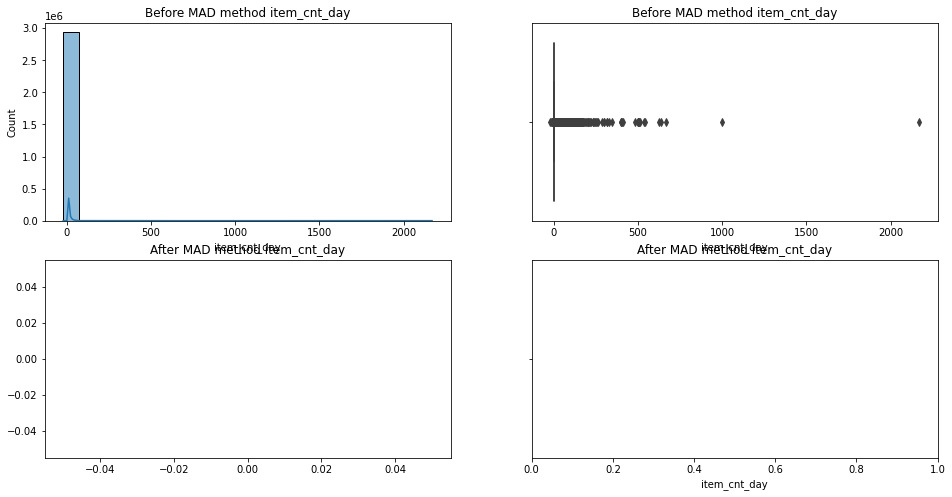

Empty DataFrame
Columns: [index, date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []
Done
Removing outliers from column:  item_cnt_day  using IQR


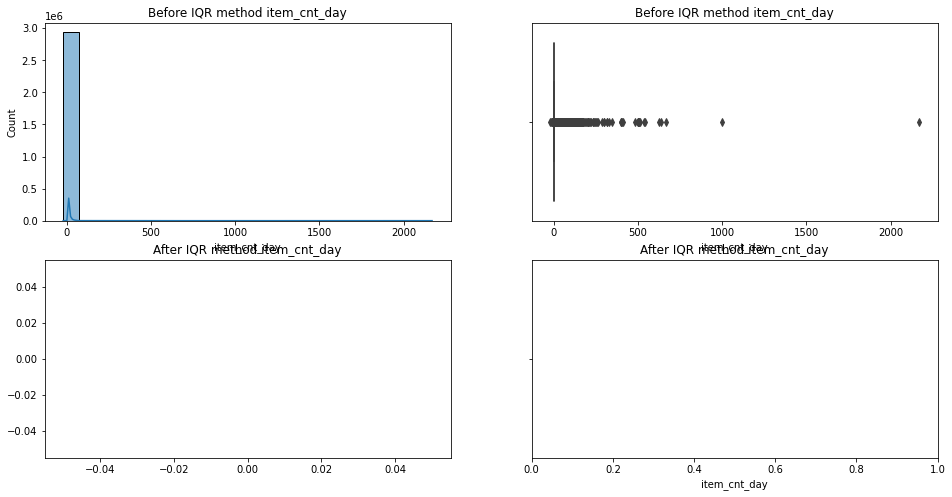

Empty DataFrame
Columns: [index, date, date_block_num, shop_id, item_id, item_price, item_cnt_day]
Index: []


In [96]:
outliers_MAD(df, 'item_cnt_day')  # just run does not modify frame
outlier_IQR(df, 'item_cnt_day')  # modifies df

In [99]:
df['item_cnt_day'].value_counts()

1.0       2629371
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
251.0           1
501.0           1
112.0           1
164.0           1
2169.0          1
Name: item_cnt_day, Length: 198, dtype: int64

# Time Series Analysis

- 2014 - 2015 russian financial crisis
- October -> russian october revolution (e.g 20)
- (some shops opened for just one month e.g. 11)

In [30]:
df.groupby(by='shop_id')['item_cnt_day'].count()

shop_id
0       9857
1       5678
2      25991
3      25532
4      38242
5      38179
6      82663
7      58076
8       3412
9       3751
10     21397
11       499
12     34694
13     17824
14     36979
15     59511
16     52734
17     22950
18     53227
19     63911
20      1792
21     58133
22     45434
23      6963
24     53032
25    186104
26     53910
27    105366
28    142234
29     49225
30     50860
31    235636
32      7947
33      5027
34      5752
35     58445
36       306
37     39638
38     46013
39     13440
40      4257
41     41967
42    109253
43     39282
44     39530
45     35891
46     66321
47     56695
48     21612
49     15849
50     65173
51     44433
52     43502
53     52921
54    143480
55     34769
56     69573
57    117428
58     71441
59     42108
Name: item_cnt_day, dtype: int64

In [19]:
shop_df = df.groupby(by='shop_id')
shop_df.first()

,date,date_block_num,item_id,item_price,item_cnt_day
shop_id,,,,,
0,12.01.2013,0,11059,73.00,1.0
1,14.01.2013,0,8070,137.00,1.0
2,14.01.2013,0,11330,149.00,1.0
3,26.01.2013,0,13102,1290.00,1.0
4,12.01.2013,0,5605,489.30,1.0
5,21.02.2013,1,2750,2499.00,1.0
6,03.01.2013,0,32,349.00,1.0
7,09.01.2013,0,2441,1199.00,1.0
8,21.01.2013,0,11017,199.00,1.0


In [36]:
shop_df.get_group(54).groupby(by='date_block_num')['item_cnt_day'].count()

date_block_num
0     7526
1     6359
2     7299
3     5553
4     5595
5     6152
6     5755
7     6329
8     5480
9     4990
10    5646
11    7376
12    6327
13    4691
14    5159
15    4122
16    4344
17    4866
18    4323
19    4845
20    3572
21    3706
22    4466
23    5693
24    4855
25    3769
26    4012
27     670
Name: item_cnt_day, dtype: int64